<a href="https://colab.research.google.com/github/jscorrea16/Pandas/blob/main/Activity_13_Joshua_Correa_CIDM_5310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Activity 13
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Read in the bike_share.csv data

rental_data = pd.read_csv('/content/drive/MyDrive/Dataset/bike_share.csv')

rental_data.head()

,date,hour,rentals
0,1/1/2011,0,16
1,1/1/2011,1,40
2,1/1/2011,2,32
3,1/1/2011,3,13
4,1/1/2011,4,1


In [6]:
# Create a datetime index

rental_data['date_time'] = \
[(rental_data.date[i] +
  ' ' +
  '{:02}'.format(rental_data.hour[i]) +
  ':00:00')
 for i in rental_data.index]
rental_data.set_index(pd.to_datetime(rental_data['date_time']),
                     inplace = True,
                     drop = True)
rental_data

,date,hour,rentals,date_time
date_time,,,,
2011-01-01 00:00:00,1/1/2011,0,16,1/1/2011 00:00:00
2011-01-01 01:00:00,1/1/2011,1,40,1/1/2011 01:00:00
2011-01-01 02:00:00,1/1/2011,2,32,1/1/2011 02:00:00
2011-01-01 03:00:00,1/1/2011,3,13,1/1/2011 03:00:00
2011-01-01 04:00:00,1/1/2011,4,1,1/1/2011 04:00:00
...,...,...,...,...
2012-12-31 19:00:00,12/31/2012,19,119,12/31/2012 19:00:00
2012-12-31 20:00:00,12/31/2012,20,89,12/31/2012 20:00:00
2012-12-31 21:00:00,12/31/2012,21,90,12/31/2012 21:00:00


<Axes: xlabel='date_time'>

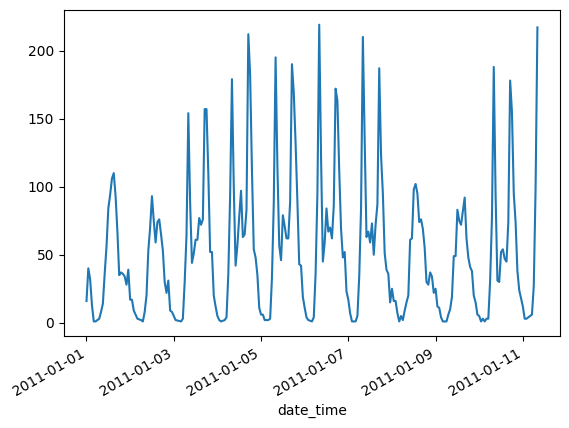

In [7]:
# Generate a simple plot of the first 240 hours of data:

rental_data['rentals'][:240].plot()

In [8]:
# Using the index and the rentals column, downsample the data to 1-day
# intervals. You want total rentals per day, so choose the appropriate
# aggregation function:

rental_data = pd.DataFrame(rental_data['rentals'].resample('1d').sum())

rental_data.head(14)

,rentals
date_time,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
2011-01-06,1606
2011-01-07,1510
2011-01-08,959
2011-01-09,822


<Axes: xlabel='date_time'>

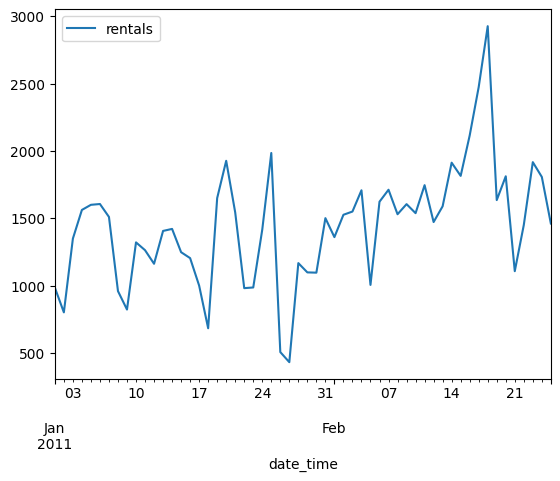

In [9]:
# Generate a simple plot of the first 8
# weeks (56 days) of the resampled data:

rental_data[:56].plot()

<function matplotlib.pyplot.show(close=None, block=None)>

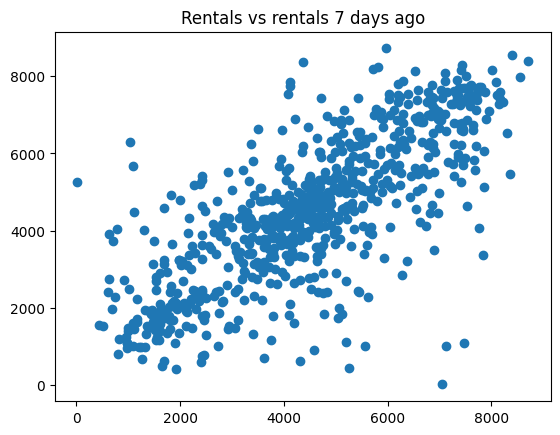

In [10]:
# You should notice that there are ups and downs
# that seem to be on a 7-day cycle. Make a plot of
# the rentals on a given day versus the rentals 7 days
# in the past to explore this idea:

fig, ax = plt.subplots()

ax.scatter(rental_data['rentals'][:(rental_data.shape[0] - 7)],
          rental_data['rentals'][7:])
ax.set_title('Rentals vs rentals 7 days ago')

plt.show

In [11]:
# You want to generate a new column in the data
# with the rentals from 7 days in the past for each day.

lagged_rentals =\
    rental_data['rentals'][:(rental_data.shape[0] - 7)]
lagged_rentals.index = rental_data.index[7:]
rental_data['lagged_rentals'] = lagged_rentals

rental_data

,rentals,lagged_rentals
date_time,,
2011-01-01,985,NaN
2011-01-02,801,NaN
2011-01-03,1349,NaN
2011-01-04,1562,NaN
2011-01-05,1600,NaN
...,...,...
2012-12-27,2114,4128.0
2012-12-28,3095,3623.0
2012-12-29,1341,1749.0


In [12]:
# By using model_data = rental_data.copy()
# first, you ensure you don't make any changes to the
# original data. Create an instance of LinearRegression()
# fit the model, and get the R2 score:

model_data = rental_data.copy()[rental_data['lagged_rentals'].isna() == False]
lagged_model = LinearRegression()
lagged_model.fit(model_data['lagged_rentals'].values.reshape(-1, 1),
                 model_data['rentals'].values.reshape(-1, 1))
model_data['predicted'] =\
    lagged_model.predict(model_data['lagged_rentals'].values.reshape(-1, 1))
R2 = lagged_model.score(model_data['rentals'].values.reshape(-1, 1),
                        model_data['predicted'].values.reshape(-1, 1))
print('R2 is ', R2, ' using:')
print(model_data[['rentals', 'lagged_rentals']].head())

R2 is  0.5145071365683822  using:
            rentals  lagged_rentals
date_time                          
2011-01-08      959           985.0
2011-01-09      822           801.0
2011-01-10     1321          1349.0
2011-01-11     1263          1562.0
2011-01-12     1162          1600.0


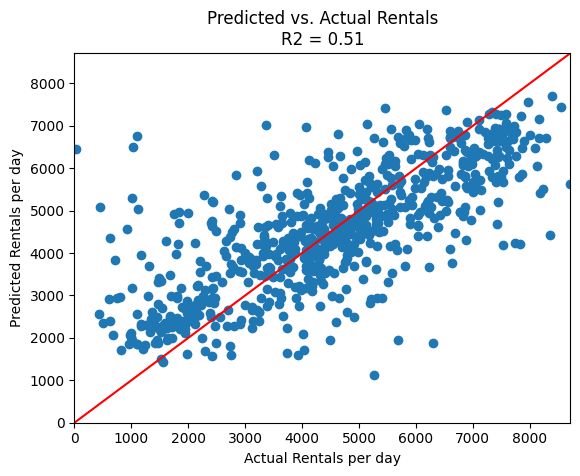

In [14]:
# Plot the predicted values versus the actual values.
# Make the x and y scales the same and add a diagonal line.

fig, ax = plt.subplots()
ax.scatter(model_data['rentals'],
           model_data['predicted'])
xlim = (0, max(pd.concat([model_data['predicted'],
                          model_data['rentals']])))
ylim = xlim
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot([xlim[0], xlim[1]],
        [ylim[0], ylim[1]],
       color = 'red')
ax.set_title('Predicted vs. Actual Rentals\n' +
             'R2 = ' + str(round(R2, 2)))
ax.set_xlabel('Actual Rentals per day')
ax.set_ylabel('Predicted Rentals per day')


plt.show()

In [ ]:
# Ready for Grading